In [2]:
curr_dir = '/user_data/vayzenbe/GitHub_Repos/LiMA'

import sys
sys.path.insert(1, f'{curr_dir}')
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.image as img
import scipy.io as spio
import torch
from LoadFrames import LoadFrames
from torchvision import transforms

In [31]:
infant_df = pd.read_csv(f'{curr_dir}/Infant_Data/Exp1_Infant_Data.csv')
model_df = pd.read_csv(f'{curr_dir}/modelling/gbj_data/Exp1_gbj_dist_object.csv')
infant_df = infant_df.replace(266,26)

In [32]:
infant_df

,Subj,Age,Gender,FirstTest,skel1,sf1,skel2,sf2,HabStart,HabEnd,...,NonPam,Familiar1,Familiar2,Familiar3,Novel1,Novel2,Novel3,FirstTest_Fix,NonPam_Familiar,NonPam_Novel
0,1001,12.20000,F,Novel,23,Skel,31,Bulge,15.74500,4.20050,...,1,NaN,4.912,1.238,13.014,1.430,3.457,13.014,0,1
1,1002,10.70000,M,Familiar,31,Skel,23,Bulge,16.66780,6.33220,...,1,6.460,3.262,4.190,6.224,9.356,3.701,6.460,0,1
2,1003,11.83330,M,Familiar,31,Bulge,23,Skel,12.18070,4.29275,...,1,8.760,7.118,4.381,55.713,10.149,5.327,8.760,1,1
3,1004,11.13330,F,Novel,31,Bulge,23,Skel,6.26800,2.90650,...,1,3.126,3.629,1.749,4.458,4.043,3.386,4.458,0,1
4,1005,11.23330,F,Novel,31,Skel,23,Bulge,6.57325,2.76125,...,1,3.343,4.249,1.243,17.175,2.511,4.934,17.175,1,1
5,1006,11.13330,F,Familiar,23,Skel,31,Bulge,11.00250,3.78750,...,0,15.282,1.902,2.359,4.894,3.277,3.317,15.282,1,1
6,1007,7.36667,F,Familiar,31,Skel,23,Bulge,3.02100,7.68400,...,1,0.690,5.405,2.519,11.882,3.582,3.256,0.690,0,0
7,1008,7.63333,M,Novel,31,Bulge,23,Skel,6.06350,1.81120,...,1,2.412,1.682,NaN,11.395,2.692,1.407,11.395,1,1
8,1009,9.96667,F,Familiar,23,Bulge,31,Skel,13.03500,6.02025,...,0,12.356,8.244,6.756,2.628,2.879,14.815,12.356,1,1
9,1010,6.80000,F,Novel,23,Bulge,31,Skel,10.71820,4.86725,...,1,2.412,2.922,4.532,6.465,3.140,1.937,6.465,0,0


In [39]:
for ee in ['Exp1', 'Exp2']:
    infant_df = pd.read_csv(f'{curr_dir}/Infant_Data/{ee}_Infant_Data.csv')
    infant_df = infant_df.replace(266,26)
    for mm in ['pixel','gbj']:
        model_df = pd.read_csv(f'{curr_dir}/modelling/{mm}_data/{ee}_{mm}_dist_object_pw.csv')
        all_dist = []
        for ii in range(0,len(infant_df)):
            mean_dist = model_df.groupby(['skel1','sf1','skel2','sf2']).mean()
            sk1 = infant_df['skel1'][ii]
            sk2 = infant_df['skel2'][ii]
            sf1 = infant_df['sf1'][ii]
            sf2 = infant_df['sf2'][ii]
            novel_dist = mean_dist['dist'][sk1,sf1,sk2,sf2]
            fam_dist = mean_dist['dist'][sk1,sf1,sk1,sf2]
            all_dist.append(novel_dist-fam_dist)

        infant_df[mm] = all_dist
    
    infant_df.to_csv(f'{ee}_ancova_test.csv')

In [37]:
infant_df.to_csv('exp1_ancova_test.csv')

In [23]:
means

dist
skel1 sf1   skel2 sf2               
23    Bulge 23    Bulge     0.000000
                  Skel   7519.727199
            26    Bulge  9504.706182
                  Skel   8647.995330
            31    Bulge  8934.111175
                  Skel   8163.315638
      Skel  23    Bulge  7519.727199
                  Skel      0.000000
            26    Bulge  8452.033381
                  Skel   6464.322664
            31    Bulge  8075.672622
                  Skel   5944.077472
26    Bulge 23    Bulge  9504.706182
                  Skel   8452.033381
            26    Bulge     0.000000
                  Skel   7451.715770
            31    Bulge  9791.345845
                  Skel   8828.570608
      Skel  23    Bulge  8647.995330
                  Skel   6464.322664
            26    Bulge  7451.715770
                  Skel      0.000000
            31    Bulge  8753.342516
                  Skel   6789.305198
31    Bulge 23    Bulge  8934.111175
                  Skel   8075.672622
            26    Bulge  9791.345845
                  Skel   8753.342516
            31    Bulge     0.000000
                  Skel   7268.297397
      Skel  23    Bulge  8163.315638
                  Skel   5944.077472
            26    Bulge  8828.570608
                  Skel   6789.305198
            31    Bulge  7268.297397
                  Skel      0.000000

In [15]:
model_df

,skel1,sf1,skel2,sf2,skel_cond,sf_cond,dist
0,23,Skel,23,Skel,same,same,0.000000
1,23,Skel,23,Bulge,same,diff,7519.727199
2,23,Skel,31,Skel,diff,same,5944.077472
3,23,Skel,31,Bulge,diff,diff,8075.672622
4,23,Skel,26,Skel,diff,same,6464.322664
5,23,Skel,26,Bulge,diff,diff,8452.033381
6,23,Bulge,23,Skel,same,diff,7519.727199
7,23,Bulge,23,Bulge,same,same,0.000000
8,23,Bulge,31,Skel,diff,diff,8163.315638
9,23,Bulge,31,Bulge,diff,same,8934.111175


In [8]:
df

,Subj,Age,Gender,FirstTest,skel1,sf1,skel2,sf2,HabStart,HabEnd,...,NonPam,Familiar1,Familiar2,Familiar3,Novel1,Novel2,Novel3,FirstTest_Fix,NonPam_Familiar,NonPam_Novel
0,1001,12.20000,F,Novel,23,Skel,31,Bulge,15.74500,4.20050,...,1,NaN,4.912,1.238,13.014,1.430,3.457,13.014,0,1
1,1002,10.70000,M,Familiar,31,Skel,23,Bulge,16.66780,6.33220,...,1,6.460,3.262,4.190,6.224,9.356,3.701,6.460,0,1
2,1003,11.83330,M,Familiar,31,Bulge,23,Skel,12.18070,4.29275,...,1,8.760,7.118,4.381,55.713,10.149,5.327,8.760,1,1
3,1004,11.13330,F,Novel,31,Bulge,23,Skel,6.26800,2.90650,...,1,3.126,3.629,1.749,4.458,4.043,3.386,4.458,0,1
4,1005,11.23330,F,Novel,31,Skel,23,Bulge,6.57325,2.76125,...,1,3.343,4.249,1.243,17.175,2.511,4.934,17.175,1,1
5,1006,11.13330,F,Familiar,23,Skel,31,Bulge,11.00250,3.78750,...,0,15.282,1.902,2.359,4.894,3.277,3.317,15.282,1,1
6,1007,7.36667,F,Familiar,31,Skel,23,Bulge,3.02100,7.68400,...,1,0.690,5.405,2.519,11.882,3.582,3.256,0.690,0,0
7,1008,7.63333,M,Novel,31,Bulge,23,Skel,6.06350,1.81120,...,1,2.412,1.682,NaN,11.395,2.692,1.407,11.395,1,1
8,1009,9.96667,F,Familiar,23,Bulge,31,Skel,13.03500,6.02025,...,0,12.356,8.244,6.756,2.628,2.879,14.815,12.356,1,1
9,1010,6.80000,F,Novel,23,Bulge,31,Skel,10.71820,4.86725,...,1,2.412,2.922,4.532,6.465,3.140,1.937,6.465,0,0


In [14]:
transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])])

In [3]:
mat = spio.loadmat('/user_data/vayzenbe/GitHub_Repos/LiMA/modelling/test_3d_struct.mat', squeeze_me=True)

In [9]:
mat['allData'][0].shape

(100, 40, 2)

In [15]:
hab_dataset = LoadFrames(f'{curr_dir}/Frames/Figure_23_Bulge', transform=transform)
trainloader = torch.utils.data.DataLoader(hab_dataset, batch_size=1, shuffle=True, num_workers = 2, pin_memory=True)

FileNotFoundError: [Errno 2] No such file or directory: 'Frames/Figure_23_Bulge'

<AxesSubplot:>

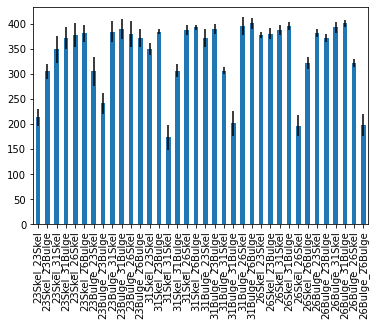

In [37]:
mean = df.mean()
error = df.std()
mean.plot(kind = 'bar', yerr=error)

In [19]:
def compare_frames(frame_ims1, frame_ims2):
    all_dists =[]
    for ff in enumerate(frame_ims1):
        all_dists.append(np.linalg.norm(frame_ims1[ff[0]] - frame_ims2[ff[0]]))
            
    return all_dists

def compare_frames_pw(frame_ims1, frame_ims2):
    all_dists =[]
    for ff1 in frame_ims1:
        temp_dist = []
        for ff2 in frame_ims2:
            temp_dist.append(np.linalg.norm(ff1 - ff2))
            print(len(temp_dist))
        
        all_dists.append(np.mean(temp_dist))
            
    return all_dists

In [20]:
mat = spio.loadmat('gbj_data/Figure_23_Bulge_GBJ_Acts.mat', squeeze_me=True)
frame_ims1 = mat['stimActs_GBJ'] #extract acts as np array
mat = spio.loadmat('gbj_data/Figure_23_Skel_GBJ_Acts.mat', squeeze_me=True)
frame_ims2 = mat['stimActs_GBJ'] #extract acts as np array

In [16]:
len(dists)

300

In [6]:
im_file1 = '/user_data/vayzenbe/GitHub_Repos/LiMA/Frames/Figure_23_Bulge/Figure_23_Bulge_1.jpg'
im_file2 = '/user_data/vayzenbe/GitHub_Repos/LiMA/Frames/Figure_23_Bulge/Figure_23_Bulge_2.jpg'

In [17]:
im1=np.array(Image.open(im_file1).convert('L'))
im2=np.array(Image.open(im_file2).convert('L'))

In [18]:
im1.shape

(350, 350)

In [21]:
dist = np.linalg.norm(im1 - im2)
dist_im = im1-im2

In [20]:
dist

20108.374573793873

In [12]:
np.sqrt((9-5)^2)

2.449489742783178

In [11]:
4^2

6